In [9]:
import re
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [10]:

def splliter(data, i):
    f = lambda a: float(a.replace(',', '.'))

    splitted = list(filter(''.__ne__, data.split('\n')))
    splitted = [re.split(' +', re.split(': +', l)[1]) for l in splitted[i:]]
    splitted = [list(map(f, l)) for l in splitted]
    splitted = [sum(l) / len(l) for l in splitted]

    return splitted


def oneRecordToDict(r):
    times = r[0]
    access = r[1]

    spllited = list(filter(''.__ne__, times.split('\n')))
    params = spllited[0][1:-1].split(', ')
    for i in range(1, len(params)):
        params[i] = int(params[i])

    d = {}
#     d['subject'] = params[0]
    d['p_numb'] = params[1]
    d['c_num'] = params[2]
    d['bufferSize'] = params[3]
    d['optNumbCoeff'] = params[4]
    d['complReqOptNumbCoeff'] = params[5]
    d['actionCostCoeff'] = params[6]
    

    timesSplit = splliter(times, 3)

    d['p_time'] = timesSplit[0]
    d['p_cput'] = timesSplit[1]
    d['p_meas.'] = timesSplit[2]
    d['c_time'] = timesSplit[3]
    d['c_cput'] = timesSplit[4]
    d['c_meas.'] = timesSplit[5]

    accessSplit = splliter(access, 1)

    d['p_access'] = accessSplit[0]
    d['p_compl'] = accessSplit[1]
    d['p_ratio'] = accessSplit[2]
    d['c_access'] = accessSplit[3]
    d['c_compl'] = accessSplit[4]
    d['c_ratio'] = accessSplit[5]
    return d


def parse(path):
    content = ""
    with open(path) as fh:
        content = fh.read()
    content = content.replace("tasks", "tasks:").replace("times", "times:").replace("ratios", "ratios:")
    measures = re.split("_+\n", content)
    measures = [re.split("-+\n", m) for m in measures][:-1]

    measures = [oneRecordToDict(r) for r in measures]

    measures = pd.DataFrame.from_records(measures)

    return measures


'p_numb', 'c_num', 'bufferSize', 'optNumbCoeff', 'complReqOptNumbCoeff', 'actionCostCoeff',

'p_time', 'p_cput', 'p_meas.', 'c_time', 'c_cput', 'c_meas.',

'p_access', 'p_compl', 'p_ratio', 'c_access', 'c_compl', 'c_ratio'

In [30]:
pathBuffer = 'res-buffer.txt'
pathActObject = 'res-actObject.txt'

measuresBuffer = parse(pathBuffer)
measureActObject = parse(pathActObject)

<AxesSubplot:xlabel='actionCostCoeff', ylabel='optNumbCoeff'>

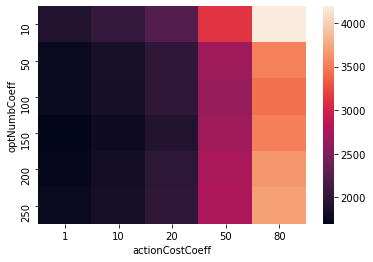

In [31]:
data = pd.pivot_table(measuresBuffer, values='c_time', 
                     index=['optNumbCoeff'], 
                     columns='actionCostCoeff')
sns.heatmap(data)


<AxesSubplot:xlabel='actionCostCoeff', ylabel='optNumbCoeff'>

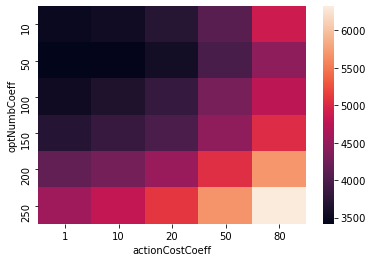

In [32]:
data = pd.pivot_table(measureActObject, values='c_time', 
                     index=['optNumbCoeff'], 
                     columns='actionCostCoeff')
sns.heatmap(data)